## Import Required Libraries

We'll import all necessary Python libraries for financial data analysis, portfolio optimization, and visualization.

In [36]:
import warnings
import os
from datetime import datetime, timedelta
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyoff
from IPython.display import display, Markdown


from Backtester.BacktestResults import TestResults

warnings.filterwarnings('ignore')

## Load backtest data

In [37]:
universe_name = "selection3";test_name = "GEM_LP"

In [38]:
# Load strategy_settings from strategies.json

test_path = f"data/{universe_name}/{test_name}"
test_images_path = os.path.join(test_path, "images",test_name)

with open(f"{test_path}/strategies.json", "r") as f:
    strategy_settings = json.load(f)

strategy_rows = []
for strategy in strategy_settings[0:]:
    strategy_name = list(strategy.keys())[0]
    strategy_params = strategy[strategy_name][1]
    strategy_function_params = strategy_params.get('portfolio_func_kwargs', {})
    # remove portfolio_func_kwargs from strategy_params for clarity
    if 'portfolio_func_kwargs' in strategy_params:
        del strategy_params['portfolio_func_kwargs']
    row = {'strategy_name': strategy_name}
    row.update(strategy_params)
    row.update(strategy_function_params)
    strategy_rows.append(row)

# Create DataFrame
strategy_params_df = pd.DataFrame(strategy_rows)
strategy_params_df = strategy_params_df.set_index('strategy_name').sort_index()
display(strategy_params_df)

with open(f"{test_images_path}/strategy_params.md", "w") as f:
    f.write("#### Strategy Parameters\n\n")
    f.write(strategy_params_df.to_markdown())

,buy_slippage_buffer,use_stops,trailing_stop,trail_percent,verbose,allow_short,momentum_periods,min_positive_periods,treasury_threshold,maximum_positions,risk_free_asset,momentum_top_n,momentum_lookback,covariance_lookback
strategy_name,,,,,,,,,,,,,,
AAA1,0.03,False,False,0.05,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,126.0,21.0
AAA1_noComission,0.03,False,False,0.05,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,126.0,21.0
AAA2,0.03,True,True,0.05,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,126.0,21.0
AAA2_noComission,0.03,True,True,0.05,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,126.0,21.0
AAA_M1,0.03,False,False,0.05,False,NaN,NaN,NaN,NaN,NaN,NaN,10.0,126.0,21.0
EqualWeight,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEM1,0.03,False,True,0.05,False,False,"[10, 21, 63, 126]",3.0,0.0,6.0,cash,NaN,NaN,NaN
GEM3,0.03,True,True,0.05,False,False,"[10, 21, 63, 126]",3.0,0.0,6.0,cash,NaN,NaN,NaN
GEM5,0.03,True,True,0.05,False,False,"[10, 21, 63, 126]",4.0,0.0,10.0,cash,NaN,NaN,NaN


In [39]:
#load test results
test_results = TestResults(test_path)
strategies_list = test_results.list_strategies()
universe_symbols = pd.DataFrame(test_results.universe_settings['universe_symbols'])


md = f"""
### Backtest Settings

- Test path: `{test_path}`
- Number of strategies: **{len(strategies_list)}**

```json
{json.dumps(test_results.test_settings, indent=2)}
```
"""
display(Markdown(md))

display(Markdown("#### Universe Info"))
display(Markdown(universe_symbols.sort_index().to_markdown()))

#create images folder if not exists
os.makedirs(test_images_path, exist_ok=True)

with open(f"{test_images_path}/backtest_settings.md", "w") as f:
    f.write("### Backtest Settings\n\n")
    f.write(f"- Test path: `{test_path}`\n")
    f.write(f"- Number of strategies: **{len(strategies_list)}**\n\n")
    f.write("```json\n")
    f.write(json.dumps(test_results.test_settings, indent=2))
    f.write("\n```\n")

# save to a markdown file
with open(f"{test_images_path}/{universe_name}_universe.md", "w") as f:
    f.write("#### Universe Info\n\n")
    f.write(universe_symbols[['symbol','universe_asset_class',  'shortName']].sort_index().to_markdown())


### Backtest Settings

- Test path: `data/selection3/GEM_LP`
- Number of strategies: **11**

```json
{
  "universe_name": "selection3",
  "backtest_duration": 504,
  "lookback_periods": 127,
  "num_datasets": 100,
  "random_seed": 12,
  "num_assets": null,
  "test_name": "GEM_LP",
  "test_folder_path": "c:\\my-git\\DataScience-novaIMS\\APPM-individual\\data\\selection3\\GEM_LP"
}
```


#### Universe Info

| symbol   | universe_asset_class   | shortName                       | quoteType   | symbol   | language   | region   | exchange   | currency   |
|:---------|:-----------------------|:--------------------------------|:------------|:---------|:-----------|:---------|:-----------|:-----------|
| AIA      | Equity                 | iShares Asia 50 ETF             | ETF         | AIA      | en-US      | US       | NGM        | USD        |
| ARGT     | Equity                 | Global X MSCI Argentina ETF     | ETF         | ARGT     | en-US      | US       | PCX        | USD        |
| BIL      | Bonds                  | State Street SPDR Bloomberg 1-3 | ETF         | BIL      | en-US      | US       | PCX        | USD        |
| BWX      | Bonds                  | SPDR Bloomberg International Tr | ETF         | BWX      | en-US      | US       | PCX        | USD        |
| CANE     | Agriculture            | Teucrium Sugar Fund ETV         | ETF         | CANE     | en-US      | US       | PCX        | USD        |
| CORN     | Agriculture            | Teucrium Corn Fund ETV          | ETF         | CORN     | en-US      | US       | PCX        | USD        |
| CPER     | Metals                 | United States Copper Index Fund | ETF         | CPER     | en-US      | US       | PCX        | USD        |
| DBA      | Agriculture            | Invesco DB Agriculture Fund     | ETF         | DBA      | en-US      | US       | PCX        | USD        |
| DBB      | Metals                 | Invesco DB Base Metals Fund     | ETF         | DBB      | en-US      | US       | PCX        | USD        |
| DBE      | Energy                 | Invesco DB Energy Fund          | ETF         | DBE      | en-US      | US       | PCX        | USD        |
| ECH      | Equity                 | iShares Inc. iShares MSCI Chile | ETF         | ECH      | en-US      | US       | BTS        | USD        |
| EEM      | Equity                 | iShares MSCI Emerging Index Fun | ETF         | EEM      | en-US      | US       | PCX        | USD        |
| EMB      | Bonds                  | iShares J.P. Morgan USD Emergin | ETF         | EMB      | en-US      | US       | NGM        | USD        |
| EPOL     | Equity                 | iShares Trust iShares MSCI Pola | ETF         | EPOL     | en-US      | US       | PCX        | USD        |
| EWA      | Equity                 | iShares MSCI Australia Index Fu | ETF         | EWA      | en-US      | US       | PCX        | USD        |
| EWD      | Equity                 | iShares Inc iShares MSCI Sweden | ETF         | EWD      | en-US      | US       | PCX        | USD        |
| EWG      | Equity                 | iShares MSCI Germany Index Fund | ETF         | EWG      | en-US      | US       | PCX        | USD        |
| EWI      | Equity                 | iShares Inc iShares MSCI Italy  | ETF         | EWI      | en-US      | US       | PCX        | USD        |
| EWJ      | Equity                 | iShares MSCI Japan Index Fund   | ETF         | EWJ      | en-US      | US       | PCX        | USD        |
| EWL      | Equity                 | iShares Inc iShares MSCI Switze | ETF         | EWL      | en-US      | US       | PCX        | USD        |
| EWN      | Equity                 | iShares MSCI Netherlands Index  | ETF         | EWN      | en-US      | US       | PCX        | USD        |
| EWQ      | Equity                 | iShares MSCI France Index Fund  | ETF         | EWQ      | en-US      | US       | PCX        | USD        |
| EWT      | Equity                 | iShares Inc iShares MSCI Taiwan | ETF         | EWT      | en-US      | US       | PCX        | USD        |
| EWU      | Equity                 | iShares MSCI                    | ETF         | EWU      | en-US      | US       | PCX        | USD        |
| EWW      | Equity                 | iShares Inc iShares MSCI Mexico | ETF         | EWW      | en-US      | US       | PCX        | USD        |
| EWY      | Equity                 | iShares Inc iShares MSCI South  | ETF         | EWY      | en-US      | US       | PCX        | USD        |
| EWZ      | Equity                 | iShares Inc iShares MSCI Brazil | ETF         | EWZ      | en-US      | US       | PCX        | USD        |
| EZU      | Equity                 | iShares MSCI Eurozone ETF       | ETF         | EZU      | en-US      | US       | BTS        | USD        |
| FEZ      | Equity                 | SPDR DJ Euro STOXX 50 Etf       | ETF         | FEZ      | en-US      | US       | PCX        | USD        |
| GLD      | Metals                 | SPDR Gold Trust                 | ETF         | GLD      | en-US      | US       | PCX        | USD        |
| GOVI     | Bonds                  | Invesco Equal Weight 0-30 Year  | ETF         | GOVI     | en-US      | US       | NGM        | USD        |
| GREK     | Equity                 | Global X MSCI Greece ETF        | ETF         | GREK     | en-US      | US       | PCX        | USD        |
| IEF      | Bonds                  | iShares 7-10 Year Treasury Bond | ETF         | IEF      | en-US      | US       | NGM        | USD        |
| IEV      | Equity                 | iShares Europe ETF              | ETF         | IEV      | en-US      | US       | PCX        | USD        |
| ILF      | Equity                 | iShares Latin America 40 ETF    | ETF         | ILF      | en-US      | US       | PCX        | USD        |
| INDA     | Equity                 | Ishares MSCI India ETF          | ETF         | INDA     | en-US      | US       | BTS        | USD        |
| ISTB     | Bonds                  | iShares Core 1-5 Year USD Bond  | ETF         | ISTB     | en-US      | US       | NGM        | USD        |
| MCHI     | Equity                 | iShares MSCI China ETF          | ETF         | MCHI     | en-US      | US       | NGM        | USD        |
| QQQ      | Equity                 | Invesco QQQ Trust, Series 1     | ETF         | QQQ      | en-US      | US       | NGM        | USD        |
| SLV      | Metals                 | iShares Silver Trust            | ETF         | SLV      | en-US      | US       | PCX        | USD        |
| SOYB     | Agriculture            | Teucrium Soybean Fund ETV       | ETF         | SOYB     | en-US      | US       | PCX        | USD        |
| SPY      | Equity                 | SPDR S&P 500                    | ETF         | SPY      | en-US      | US       | PCX        | USD        |
| TLH      | Bonds                  | iShares 10-20 Year Treasury Bon | ETF         | TLH      | en-US      | US       | PCX        | USD        |
| TLT      | Bonds                  | iShares 20+ Year Treasury Bond  | ETF         | TLT      | en-US      | US       | NGM        | USD        |
| TUR      | Equity                 | iShares MSCI Turkey ETF         | ETF         | TUR      | en-US      | US       | NGM        | USD        |
| UCO      | Energy                 | ProShares Ultra Bloomberg Crude | ETF         | UCO      | en-US      | US       | PCX        | USD        |
| UGA      | Energy                 | United States Gasoline Fund LP  | ETF         | UGA      | en-US      | US       | PCX        | USD        |
| UNG      | Energy                 | United States Natural Gas Fund  | ETF         | UNG      | en-US      | US       | PCX        | USD        |
| URTH     | Equity                 | iShares, Inc. iShares MSCI Worl | ETF         | URTH     | en-US      | US       | PCX        | USD        |
| USO      | Energy                 | United States Oil Fund          | ETF         | USO      | en-US      | US       | PCX        | USD        |
| VGK      | Equity                 | Vanguard FTSEEuropean ETF       | ETF         | VGK      | en-US      | US       | PCX        | USD        |
| VGSH     | Bonds                  | Vanguard Short-Term Treasury ET | ETF         | VGSH     | en-US      | US       | NGM        | USD        |
| WEAT     | Agriculture            | Teucrium Wheat Fund ETV         | ETF         | WEAT     | en-US      | US       | PCX        | USD        |

## Performance Analysis and Visualization

Let's analyze the performance of our portfolio strategies and create visualizations.

In [40]:
sort_by = 'VWR' #  'final_value' #'annual volatility' # 'max drawdown'#

strategies_avg_bt_performance = test_results.get_strategies_bt_performance(aggregator='mean') #possible values: 'mean', 'median', 'min', 'max'
#strategies_bt_median_performance = test_results.get_strategies_bt_performance(aggregator='median')
strategies_bt_min_performance = test_results.get_strategies_bt_performance(aggregator='min')
strategies_bt_max_performance = test_results.get_strategies_bt_performance(aggregator='max')

columns_to_drop = ['Calmar ratio', 'SQN', 'SQN trades', 'period_avg', 'period_stddev', 'period_positive', 'period_negative', 'period_best', 'period_worst']
strategies_avg_bt_performance = strategies_avg_bt_performance.drop(columns=columns_to_drop)
strategies_bt_min_performance = strategies_bt_min_performance.drop(columns=columns_to_drop)
strategies_bt_max_performance = strategies_bt_max_performance.drop(columns=columns_to_drop)


test_summary = pd.DataFrame(index=strategies_avg_bt_performance.index)

test_summary['Min-VWR'] = strategies_bt_min_performance['VWR']
test_summary['Avg-VWR'] = strategies_avg_bt_performance['VWR']
test_summary['Max-VWR'] = strategies_bt_max_performance['VWR']

#test_summary['Min-Sharpe ratio'] = strategies_bt_min_performance['Sharpe ratio']
#test_summary['Avg-Sharpe ratio'] = strategies_avg_bt_performance['Sharpe ratio']
#test_summary['Max-Sharpe ratio'] = strategies_bt_max_performance['Sharpe ratio']

test_summary['Min-final_value'] = strategies_bt_min_performance['final_value']
test_summary['Avg-final_value'] = strategies_avg_bt_performance['final_value']
test_summary['Max-final_value'] = strategies_bt_max_performance['final_value']

test_summary['Min-max drawdown'] = strategies_bt_min_performance['max drawdown']
test_summary['Avg-max drawdown'] = strategies_avg_bt_performance['max drawdown']
test_summary['Max-max drawdown'] = strategies_bt_max_performance['max drawdown']

test_summary['Min-annual volatility'] = strategies_bt_min_performance['annual volatility']
test_summary['Avg-annual volatility'] = strategies_avg_bt_performance['annual volatility']
test_summary['Max-annual volatility'] = strategies_bt_max_performance['annual volatility']

test_summary = test_summary.round(2)
test_summary = test_summary.sort_values('Avg-'+sort_by, ascending=False)

#save to a markdown file
with open(f"{test_images_path}/test_summary.md", "w") as f:
    f.write(f"\n\n#### {test_name} Summary\n\n")
    f.write(test_summary.to_markdown())

display(Markdown(f"#### {test_name} Summary"))
display(Markdown(test_summary.to_markdown()))

display(Markdown(f"#### {test_name} Strategies Average Backtest Performance"))
display(Markdown(strategies_avg_bt_performance.sort_values(sort_by, ascending=False).to_markdown()))

#display(Markdown("#### Strategies Median Backtest Performance"))
#display(Markdown(strategies_bt_median_performance.sort_values(sort_by, ascending=False).to_markdown()))

display(Markdown(f"#### {test_name} Strategies Min Backtest Performance"))
display(Markdown(strategies_bt_min_performance.sort_values(sort_by, ascending=False).to_markdown()))

display(Markdown(f"#### {test_name} Strategies Max Backtest Performance"))
display(Markdown(strategies_bt_max_performance.sort_values(sort_by, ascending=False).to_markdown()))


#### GEM_LP Summary

|                  |   Min-VWR |   Avg-VWR |   Max-VWR |   Min-final_value |   Avg-final_value |   Max-final_value |   Min-max drawdown |   Avg-max drawdown |   Max-max drawdown |   Min-annual volatility |   Avg-annual volatility |   Max-annual volatility |
|:-----------------|----------:|----------:|----------:|------------------:|------------------:|------------------:|-------------------:|-------------------:|-------------------:|------------------------:|------------------------:|------------------------:|
| AAA1_noComission |     -8.25 |      1.23 |     11.61 |           61470.2 |          105409   |            159270 |               0.08 |               0.18 |               0.42 |                    0.09 |                    0.13 |                    0.19 |
| AAA2_noComission |     -7.35 |      0.98 |     10.52 |           67684.2 |          104488   |            151957 |               0.08 |               0.16 |               0.35 |                    0.08 |                    0.11 |                    0.16 |
| AAA1             |     -7.91 |      0.59 |     10.76 |           64023.4 |          102764   |            153529 |               0.09 |               0.19 |               0.4  |                    0.09 |                    0.12 |                    0.19 |
| AAA_M1           |     -8.26 |      0.59 |     11.97 |           61431   |          102892   |            161746 |               0.08 |               0.19 |               0.43 |                    0.09 |                    0.13 |                    0.21 |
| EqualWeight      |     -6.25 |      0.46 |     10.73 |           74200.8 |          102389   |            153366 |               0.05 |               0.18 |               0.31 |                    0.07 |                    0.11 |                    0.18 |
| GEM5_noComission |     -7.81 |      0.31 |     12.57 |           64597.6 |          102538   |            166092 |               0.06 |               0.18 |               0.39 |                    0.08 |                    0.12 |                    0.2  |
| AAA2             |     -7.73 |      0.24 |      9.71 |           65192.5 |          101378   |            146686 |               0.09 |               0.17 |               0.37 |                    0.08 |                    0.11 |                    0.16 |
| GEM1             |     -7.48 |     -0.1  |     18.1  |           66801.1 |          101698   |            209612 |               0.1  |               0.22 |               0.38 |                    0.1  |                    0.15 |                    0.25 |
| GEM3             |     -7.35 |     -0.54 |     14.54 |           67664.3 |           99429.9 |            180738 |               0.1  |               0.22 |               0.37 |                    0.09 |                    0.14 |                    0.22 |
| GEM_M1           |     -9.01 |     -0.97 |     16.6  |           54816.2 |           97226.7 |            197025 |               0.09 |               0.26 |               0.51 |                    0.11 |                    0.16 |                    0.26 |
| GEM5             |     -8.39 |     -1.01 |     11.21 |           60293.4 |           96601.5 |            156571 |               0.07 |               0.21 |               0.43 |                    0.08 |                    0.12 |                    0.2  |

#### GEM_LP Strategies Average Backtest Performance

|                  |   Sharpe ratio |   max drawdown |   annual return |   annual volatility |        VWR |   VaR (5%) |    skewness |   kurtosis |   Sortino ratio |   final_value |
|:-----------------|---------------:|---------------:|----------------:|--------------------:|-----------:|-----------:|------------:|-----------:|----------------:|--------------:|
| AAA1_noComission |      0.0468675 |       0.179191 |     0.0224859   |            0.125849 |  1.22683   | -0.0135268 | -0.708873   |    5.23239 |      0.198461   |      105409   |
| AAA2_noComission |     -0.0270407 |       0.161778 |     0.018909    |            0.113231 |  0.981008  | -0.0125017 | -0.569418   |    3.50512 |      0.157299   |      104488   |
| AAA1             |     -0.0856284 |       0.185497 |     0.00976377  |            0.124312 |  0.594088  | -0.0135898 | -0.674164   |    4.84107 |      0.0800178  |      102764   |
| AAA_M1           |     -0.0335255 |       0.190151 |     0.00999767  |            0.131986 |  0.585777  | -0.0136359 | -0.773609   |    6.85116 |      0.0847792  |      102892   |
| EqualWeight      |      0.35189   |       0.179596 |     0.00911482  |            0.110173 |  0.457409  | -0.010839  | -0.794295   |    7.30248 |      0.118028   |      102389   |
| GEM5_noComission |     -0.0689413 |       0.184294 |     0.00688616  |            0.122214 |  0.305157  | -0.0120819 |  0.038229   |   16.0528  |      0.076576   |      102538   |
| AAA2             |     -0.197514  |       0.173098 |     0.0035972   |            0.113826 |  0.23997   | -0.0126257 | -0.596796   |    3.59758 |      0.00545162 |      101378   |
| GEM1             |     -0.272075  |       0.223602 |     0.000493003 |            0.15082  | -0.0954438 | -0.0159423 | -0.385469   |    5.96029 |     -0.137243   |      101698   |
| GEM3             |     -0.467921  |       0.220337 |    -0.00991725  |            0.14162  | -0.53768   | -0.0151039 | -0.368341   |    5.63368 |     -0.228397   |       99429.9 |
| GEM_M1           |     -0.386889  |       0.255507 |    -0.0236608   |            0.160334 | -0.965228  | -0.0167372 | -0.595622   |    6.4909  |     -0.275514   |       97226.7 |
| GEM5             |     -0.364023  |       0.20739  |    -0.0228271   |            0.122753 | -1.01331   | -0.0123329 |  0.00474099 |   16.0152  |     -0.205741   |       96601.5 |

#### GEM_LP Strategies Min Backtest Performance

|                  |   Sharpe ratio |   max drawdown |   annual return |   annual volatility |      VWR |   VaR (5%) |   skewness |   kurtosis |   Sortino ratio |   final_value |
|:-----------------|---------------:|---------------:|----------------:|--------------------:|---------:|-----------:|-----------:|-----------:|----------------:|--------------:|
| EqualWeight      |       -1.79295 |      0.0546675 |       -0.138601 |           0.0675483 | -6.24897 | -0.0142938 |   -3.92777 |   1.46527  |        -1.71689 |       74200.8 |
| GEM3             |      -13.488   |      0.100772  |       -0.177417 |           0.0924514 | -7.34967 | -0.0230844 |   -1.0338  |   1.8646   |        -1.7811  |       67664.3 |
| AAA2_noComission |       -4.93255 |      0.0801453 |       -0.177296 |           0.081329  | -7.3526  | -0.0174321 |   -1.63763 |   0.58221  |        -1.66909 |       67684.2 |
| GEM1             |       -5.19616 |      0.103231  |       -0.182681 |           0.0967139 | -7.48416 | -0.0246182 |   -1.32562 |   1.6869   |        -1.62135 |       66801.1 |
| AAA2             |       -8.40333 |      0.0854206 |       -0.192581 |           0.0815789 | -7.73272 | -0.0175717 |   -1.93732 |   0.541308 |        -1.79939 |       65192.5 |
| GEM5_noComission |       -4.81897 |      0.0593359 |       -0.196273 |           0.0812507 | -7.80751 | -0.0165692 |   -2.21126 |   1.76608  |        -1.7423  |       64597.6 |
| AAA1             |       -5.04822 |      0.0886882 |       -0.199854 |           0.0869513 | -7.90798 | -0.0196445 |   -2.80171 |   1.25779  |        -1.55143 |       64023.4 |
| AAA1_noComission |       -2.98327 |      0.0809061 |       -0.215971 |           0.0894733 | -8.25266 | -0.0193484 |   -2.90052 |   1.23555  |        -1.42341 |       61470.1 |
| AAA_M1           |       -2.36063 |      0.0832432 |       -0.216221 |           0.0908382 | -8.25602 | -0.019203  |   -3.67144 |   0.990367 |        -1.36051 |       61431   |
| GEM5             |      -10.1968  |      0.0662826 |       -0.223512 |           0.0814366 | -8.39068 | -0.0168578 |   -2.23895 |   1.73616  |        -1.96947 |       60293.4 |
| GEM_M1           |       -3.05536 |      0.0949383 |       -0.25962  |           0.105634  | -9.00918 | -0.0239874 |   -2.39371 |   1.36527  |        -2.22976 |       54816.2 |

#### GEM_LP Strategies Max Backtest Performance

|                  |   Sharpe ratio |   max drawdown |   annual return |   annual volatility |      VWR |    VaR (5%) |   skewness |   kurtosis |   Sortino ratio |   final_value |
|:-----------------|---------------:|---------------:|----------------:|--------------------:|---------:|------------:|-----------:|-----------:|----------------:|--------------:|
| GEM1             |        2.16885 |       0.380792 |        0.4478   |            0.251196 | 18.095   | -0.0108526  |  0.210049  |    46.6445 |         2.0865  |        209612 |
| GEM_M1           |        1.889   |       0.507078 |        0.403657 |            0.258756 | 16.6016  | -0.01171    |  0.750907  |    25.8365 |         2.43541 |        197025 |
| GEM3             |        2.69731 |       0.369072 |        0.34439  |            0.219919 | 14.5399  | -0.0109012  |  0.513143  |    49.2348 |         2.02031 |        180738 |
| GEM5_noComission |        3.17684 |       0.388855 |        0.288767 |            0.196817 | 12.5732  | -0.00905471 |  6.38465   |   138.267  |         2.27388 |        166092 |
| AAA_M1           |        2.84933 |       0.432119 |        0.271794 |            0.205793 | 11.9653  | -0.0088899  |  0.0117603 |    37.807  |         2.18736 |        161746 |
| AAA1_noComission |        4.53197 |       0.423245 |        0.262023 |            0.188262 | 11.6103  | -0.00920113 |  0.100014  |    20.2951 |         2.06577 |        159270 |
| GEM5             |        4.31722 |       0.425257 |        0.251284 |            0.197739 | 11.2092  | -0.00917308 |  6.28838   |   137.49   |         1.96432 |        156571 |
| AAA1             |        3.24019 |       0.397842 |        0.239069 |            0.188951 | 10.7564  | -0.00932517 |  0.102829  |    21.8788 |         1.79515 |        153529 |
| EqualWeight      |       13.4943  |       0.309682 |        0.238411 |            0.176804 | 10.7328  | -0.00612035 |  0.663786  |    32.6243 |         2.55517 |        153366 |
| AAA2_noComission |        4.36353 |       0.348178 |        0.23271  |            0.160092 | 10.5231  | -0.00915474 |  0.301747  |     9.1452 |         2.01215 |        151957 |
| AAA2             |        7.69376 |       0.371414 |        0.211138 |            0.160752 |  9.71025 | -0.00919617 |  0.280737  |    10.6796 |         1.84233 |        146686 |

#### Strategies Backtest Performance (Mean)

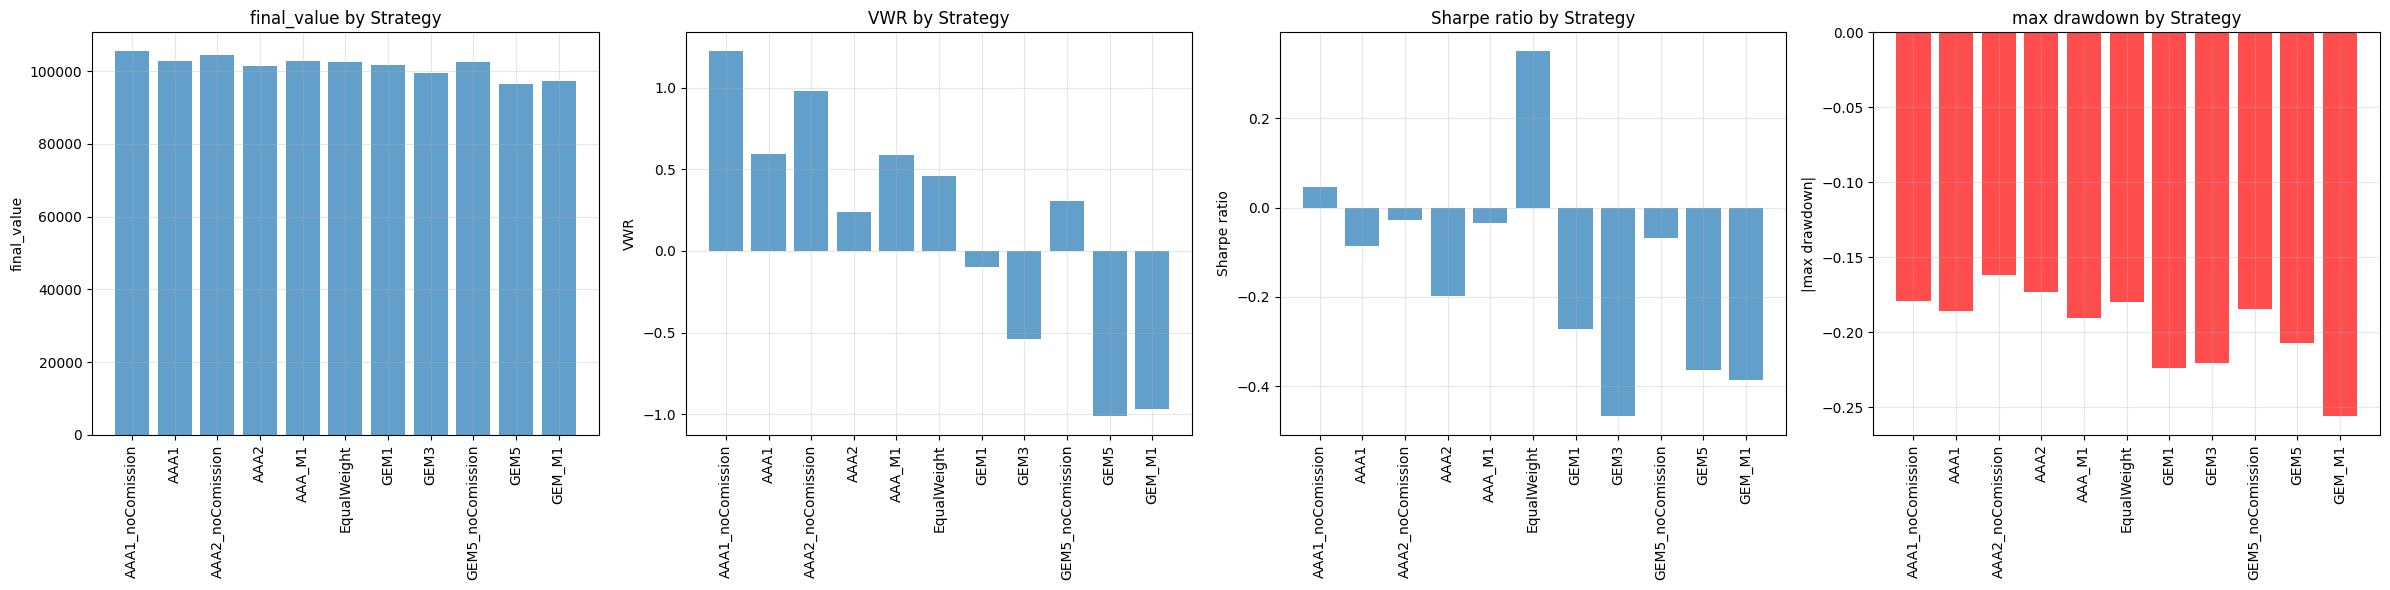

#### Strategies Backtest Performance (Min)

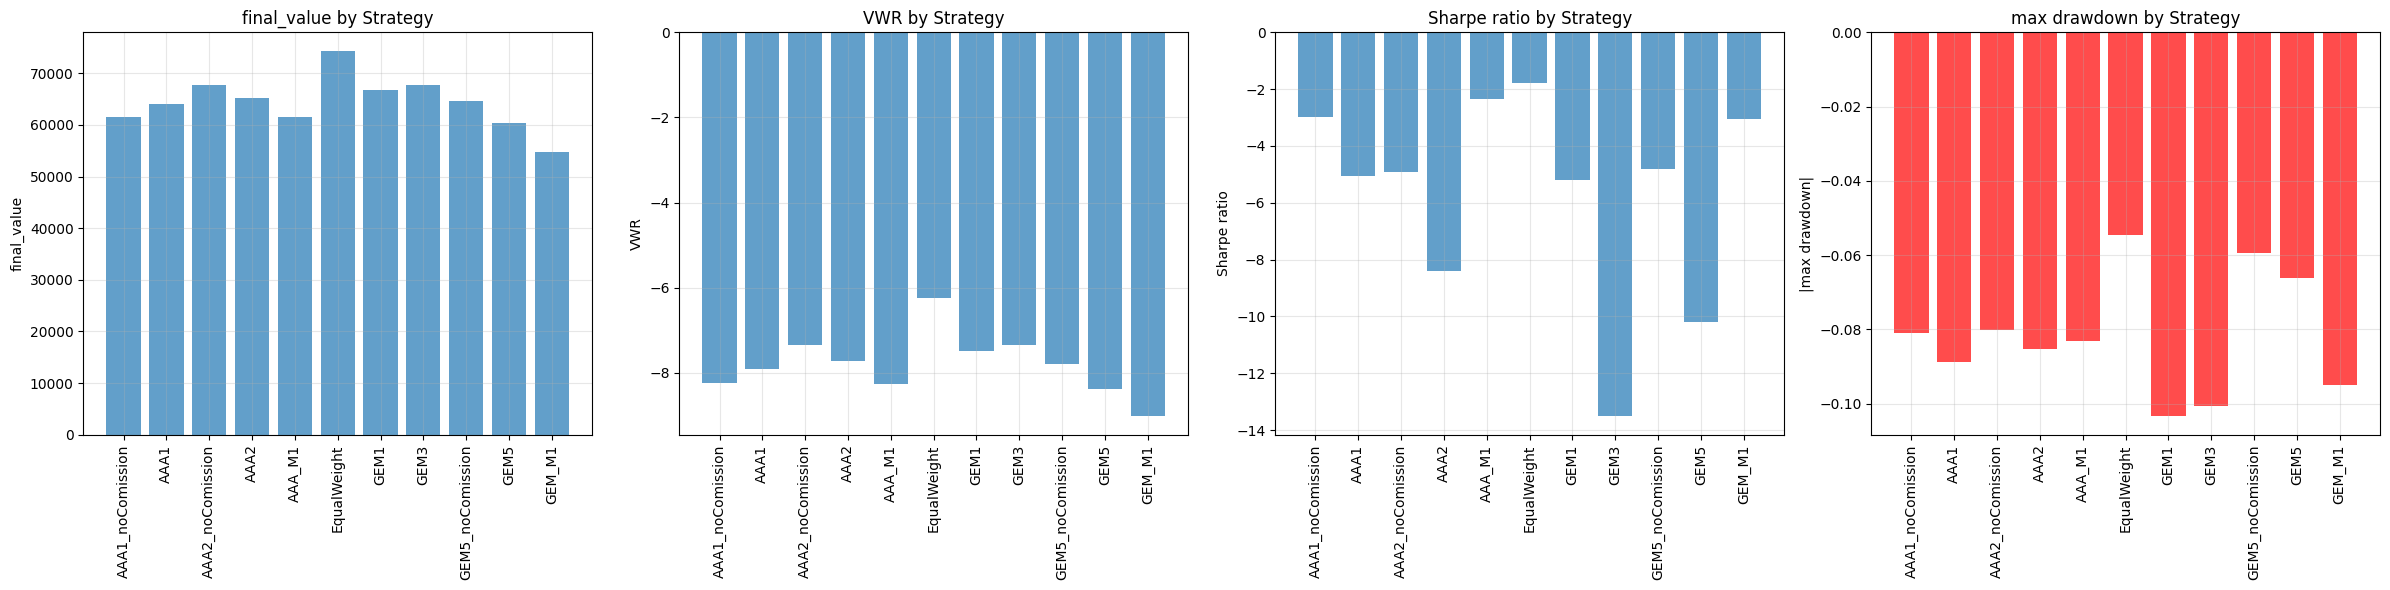

#### Strategies Backtest Performance (Max)

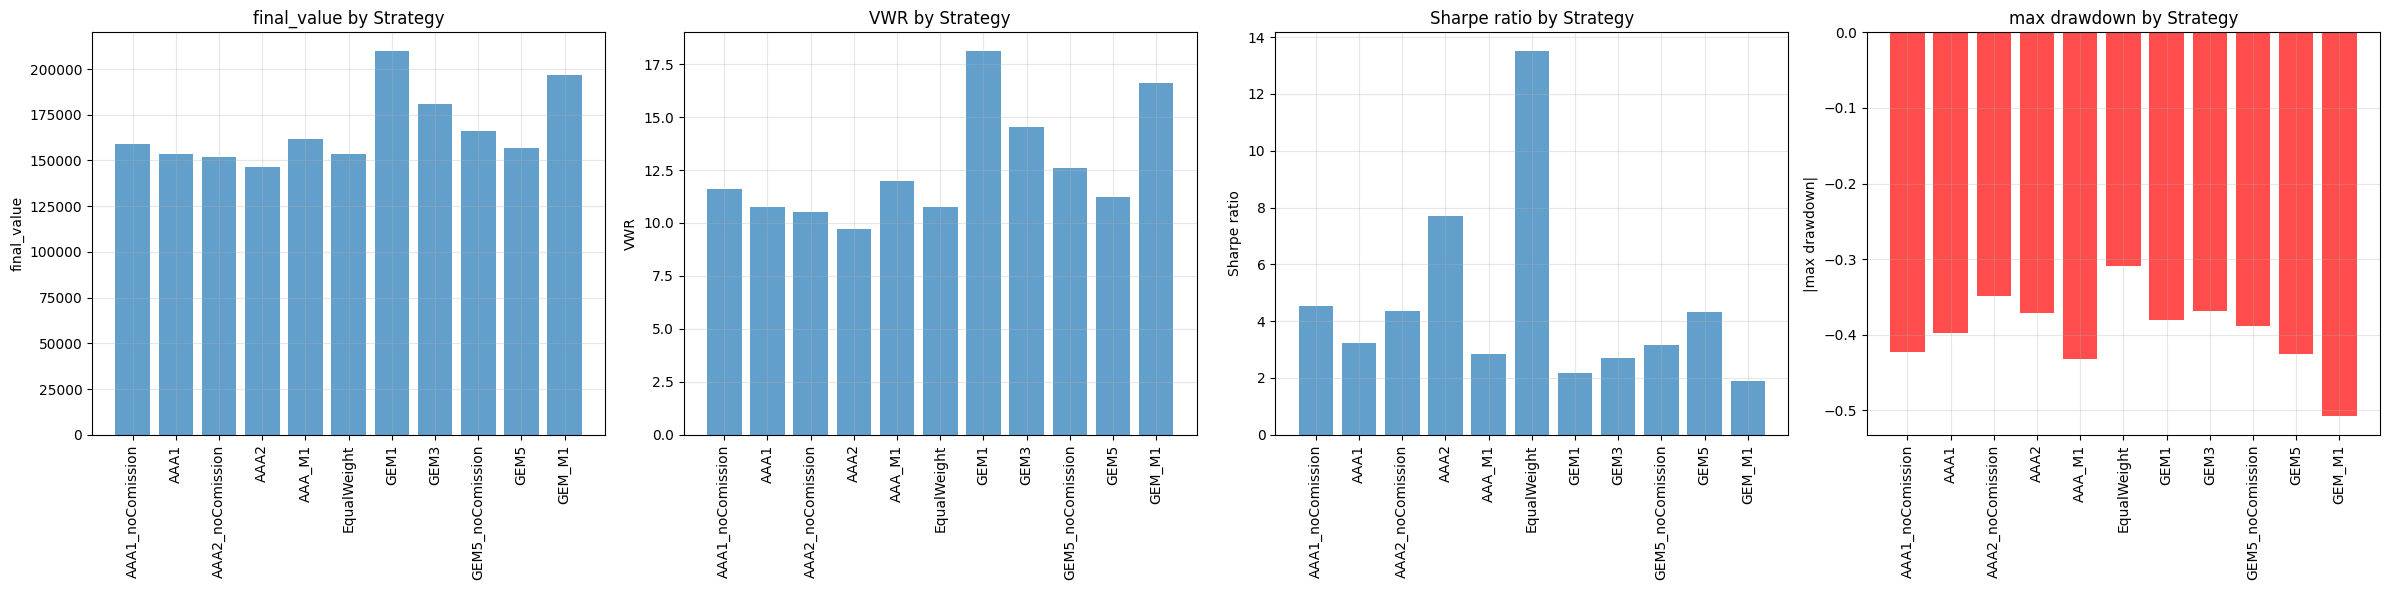

In [41]:
def plot_strategy_summary_barplot(performance_df, measures=['VWR']):
    """Create bar plot for summary performance measures across strategies"""
    available_measures = [m for m in measures if m in performance_df.columns]
    n_measures = len(available_measures)

    aggregators = ['mean', 'min', 'max']#, 'median'

    fig, axes = plt.subplots(1, n_measures, figsize=(6*n_measures, 6))
    if n_measures == 1:
        axes = [axes]

    for i, measure in enumerate(available_measures):
        ax = axes[i]
        if measure == 'max drawdown':
            ax.bar(performance_df.index, -performance_df[measure], color='red', alpha=0.7)
            ax.set_ylabel(f'|{measure}|')
        else:
            ax.bar(performance_df.index, performance_df[measure], alpha=0.7)
            ax.set_ylabel(measure)
        ax.set_title(f'{measure} by Strategy')
        ax.tick_params(axis='x', rotation=90)
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


aggregators = ['mean', 'min', 'max'] # , 'median'
for agg in aggregators:
    display(Markdown(f"#### Strategies Backtest Performance ({agg.capitalize()})"))
    strategies_bt_performance = test_results.get_strategies_bt_performance(aggregator=agg)
    plot_strategy_summary_barplot(strategies_bt_performance, ['final_value', 'VWR', 'Sharpe ratio', 'max drawdown'])#, 'annual return'


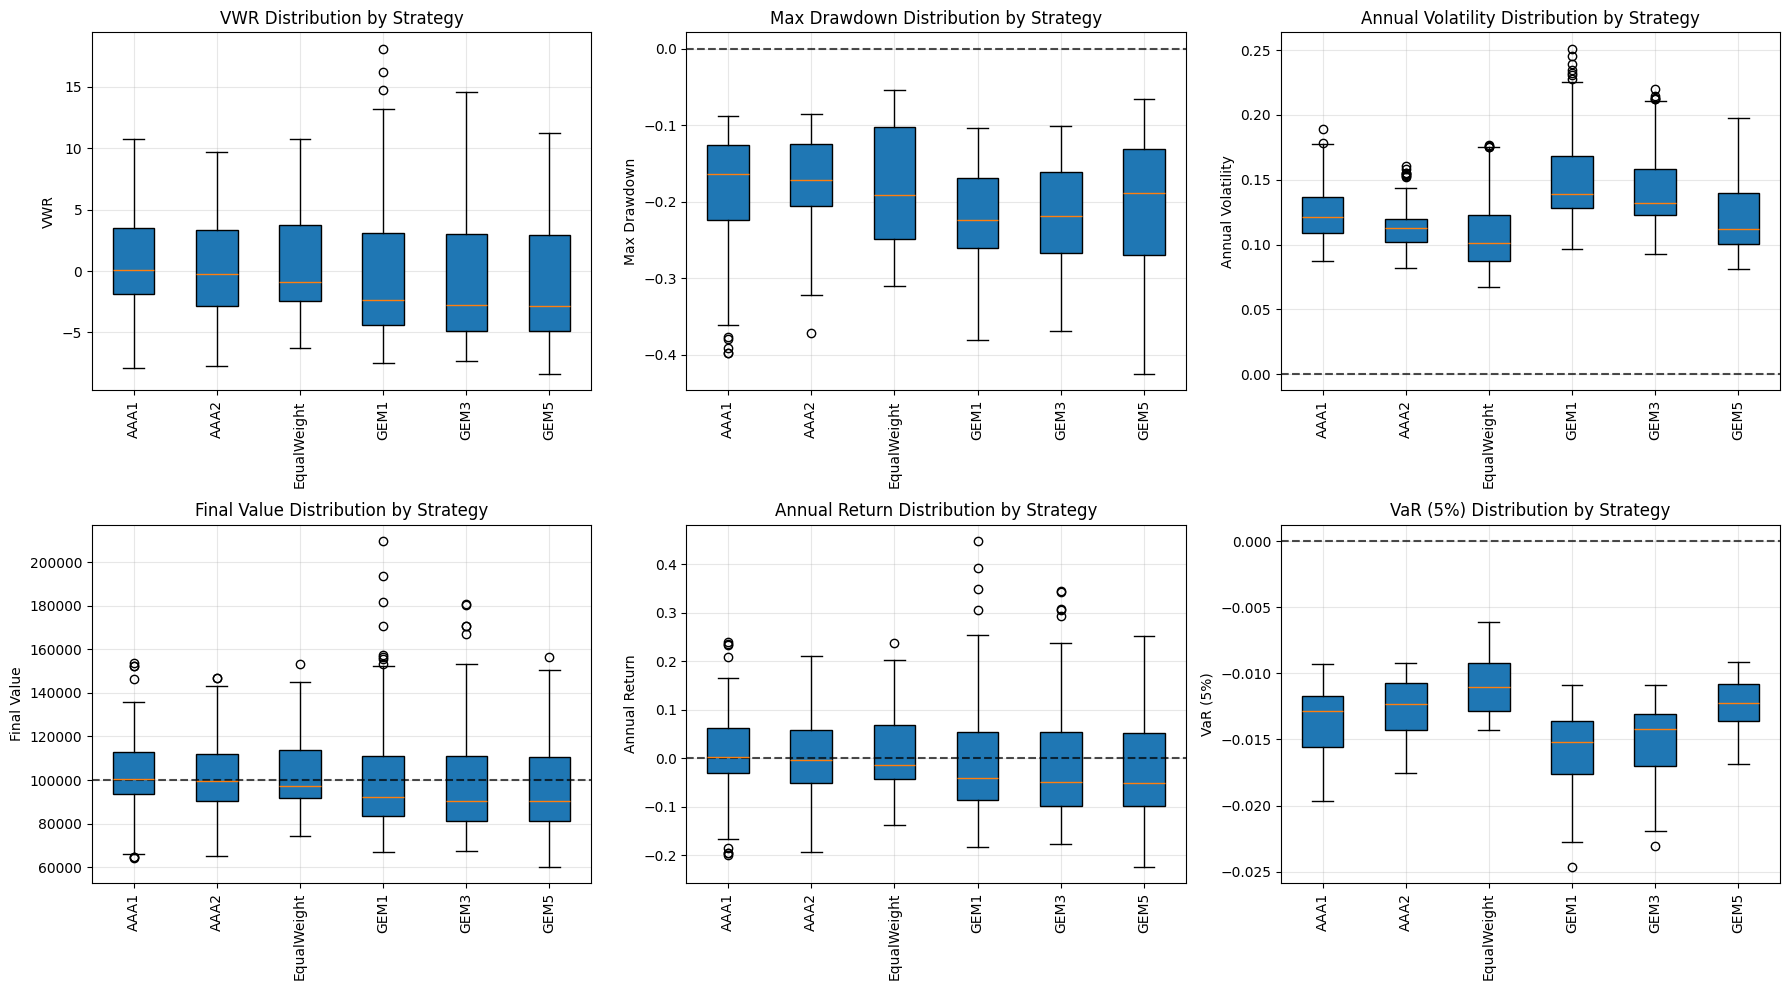

In [42]:
#filtered_strategies = strategies_list
#filtered_strategies = [s for s in strategies_list if s in ['GEM1', 'GEM_M1','AAA1','AAA_M1']]
#filtered_strategies = [s for s in strategies_list if s in ['EqualWeight', 'GEM1', 'GEM2', 'GEM3', 'GEM4','GEM5']]
filtered_strategies = [s for s in strategies_list if s in ['EqualWeight', 'AAA1', 'AAA2', 'GEM1', 'GEM3','GEM5']]
#filtered_strategies = [s for s in strategies_list if s in ['EqualWeight',  'AAA2', 'GEM5']]
#filtered_strategies = [s for s in strategies_list if s in [ 'AAA1', 'AAA1_noComission','AAA2', 'AAA2_noComission']]

#sharpe_ratios = []
annual_returns = []
max_drawdowns = []
strategy_names = []
VWRs = []
final_values = []
annual_volatilities = []
VaR_5 = []

for strategy in filtered_strategies:
    strategy_names.append(strategy)
    datasets_stats = test_results.strategies[strategy].get_datasets_bt_performance()
    #sharpe_ratios.append(datasets_stats['Sharpe ratio'].values)
    VWRs.append(datasets_stats['VWR'].values)
    annual_returns.append(datasets_stats['annual return'].values)
    max_drawdowns.append(-datasets_stats['max drawdown'].values)
    final_values.append(datasets_stats['final_value'].values)
    annual_volatilities.append(datasets_stats['annual volatility'].values)
    VaR_5.append(datasets_stats['VaR (5%)'].values)

# Create subplots for all box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot data
metrics = [
    (VWRs, 'VWR', 'VWR Distribution by Strategy', None),
    (max_drawdowns, 'Max Drawdown', 'Max Drawdown Distribution by Strategy', 0),
    (annual_volatilities, 'Annual Volatility', 'Annual Volatility Distribution by Strategy', 0),
    (final_values, 'Final Value', 'Final Value Distribution by Strategy', 100000),
    (annual_returns, 'Annual Return', 'Annual Return Distribution by Strategy', 0),
    #(sharpe_ratios, 'Sharpe Ratio', 'Sharpe Ratio Distribution by Strategy', 0),
    (VaR_5, 'VaR (5%)', 'VaR (5%) Distribution by Strategy', 0)
]

for idx, (data, ylabel, title, hline) in enumerate(metrics):
    ax = axes[idx]
    bp = ax.boxplot(data, labels=strategy_names, patch_artist=True)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=90)
    
    # Highlight reference line
    if hline is not None:
        ax.axhline(y=hline, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [43]:
#strategies_list = test_results.list_strategies()

for strategy in filtered_strategies:
    strategy_returns = test_results.strategies[strategy].get_returns()
    datasets_returns = test_results.strategies[strategy].get_datasets_returns()
    cum_returns = (datasets_returns + 1).cumprod()
    cum_strategy = (strategy_returns + 1).cumprod()

    fig = go.Figure(layout=dict(height=700))

    # Add each dataset as a trace
    for col in cum_returns.columns:
        fig.add_trace(go.Scatter(
            x=cum_returns.index,
            y=cum_returns[col],
            mode='lines',
            line=dict(color='gray', width=1),
            opacity=0.7,
            name=col,
            hoverinfo='x+y+name'
        ))

    # Add strategy returns
    fig.add_trace(go.Scatter(
        x=cum_strategy.index,
        y=cum_strategy['return'],
        mode='lines',
        line=dict(color='blue', width=2),
        name=strategy,
        hoverinfo='x+y+name'
    ))

    fig.update_layout(
        title=f'Cumulative Returns (Starting at 1) - {strategy}',
        xaxis_title='Time',
        yaxis_title='Cumulative Return',
        showlegend=False
    )

    pyoff.iplot(fig)


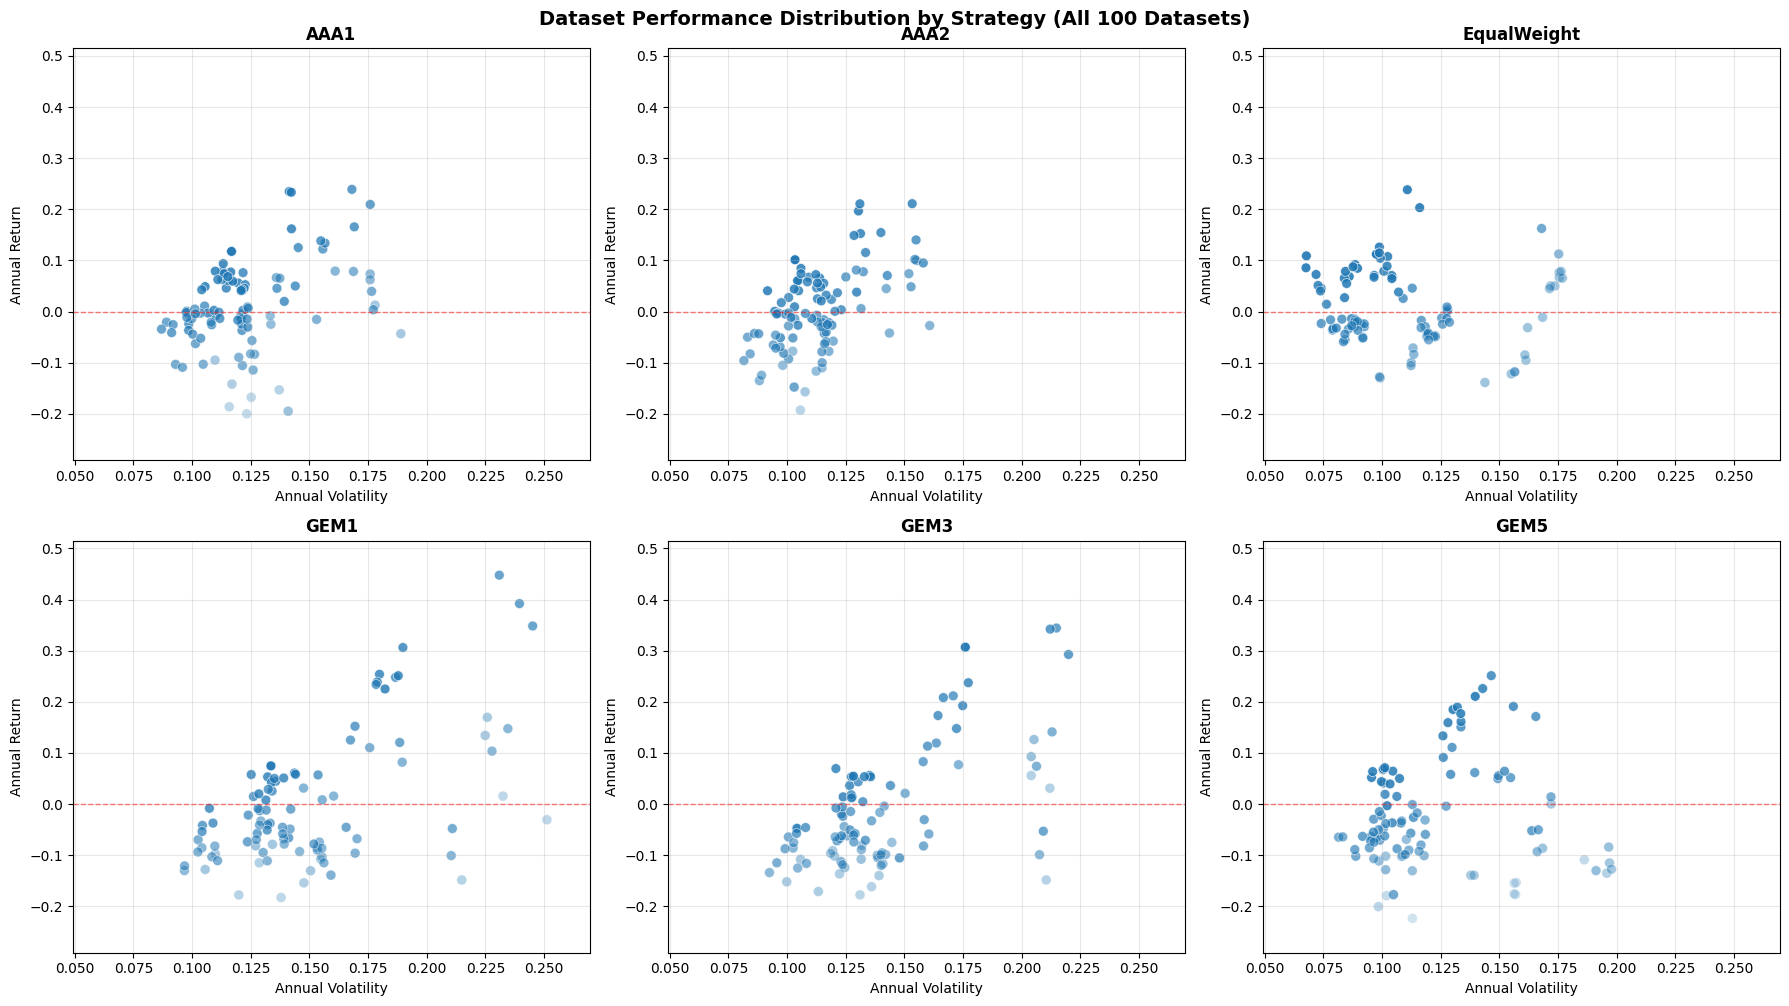

In [44]:
# Create scatter subplots for each strategy showing all datasets
# Calculate global min/max for consistent axes
all_volatilities = []
all_returns = []
all_max_drawdowns = []

for strategy in filtered_strategies:
    datasets_stats = test_results.strategies[strategy].get_datasets_bt_performance()
    all_volatilities.extend(datasets_stats['annual volatility'].values)
    all_returns.extend(datasets_stats['annual return'].values)
    all_max_drawdowns.extend(datasets_stats['max drawdown'].values)

x_min, x_max = min(all_volatilities), max(all_volatilities)
y_min, y_max = min(all_returns), max(all_returns)
dd_min, dd_max = min(all_max_drawdowns), max(all_max_drawdowns)

# Add padding
x_padding = (x_max - x_min) * 0.1
y_padding = (y_max - y_min) * 0.1

# Create subplots
n_strategies = len(filtered_strategies)
n_cols = 3
n_rows = (n_strategies + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten() if n_strategies > 1 else [axes]

for idx, strategy in enumerate(filtered_strategies):
    ax = axes[idx]
    datasets_stats = test_results.strategies[strategy].get_datasets_bt_performance()
    
    # Normalize max drawdown to alpha range [0.2, 0.9]
    # Less drawdown (closer to 0) = more opaque (higher alpha)
    max_dd = datasets_stats['max drawdown'].values
    normalized_alpha = 0.9 - 0.7 * (max_dd - dd_min) / (dd_max - dd_min) if dd_max != dd_min else 0.6
    
    scatter = ax.scatter(
        datasets_stats['annual volatility'],
        datasets_stats['annual return'],
        alpha=normalized_alpha,
        s=50,
        #c=-max_dd,  # Color by max drawdown (negative for better visualization)
        #cmap='RdYlGn',
        edgecolors='w',
        linewidth=0.5
    )
    
    ax.set_title(f'{strategy}', fontweight='bold')
    ax.set_xlabel('Annual Volatility')
    ax.set_ylabel('Annual Return')
    ax.set_xlim(x_min - x_padding, x_max + x_padding)
    ax.set_ylim(y_min - y_padding, y_max + y_padding)
    ax.grid(True, alpha=0.3)
    ax.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
    
    # Add colorbar for max drawdown
    #cbar = plt.colorbar(scatter, ax=ax)
    #cbar.set_label('Max Drawdown', rotation=270, labelpad=15)

# Hide unused subplots
for idx in range(n_strategies, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Dataset Performance Distribution by Strategy (All 100 Datasets)', 
             fontsize=14, fontweight='bold', y=1.001)
plt.show()


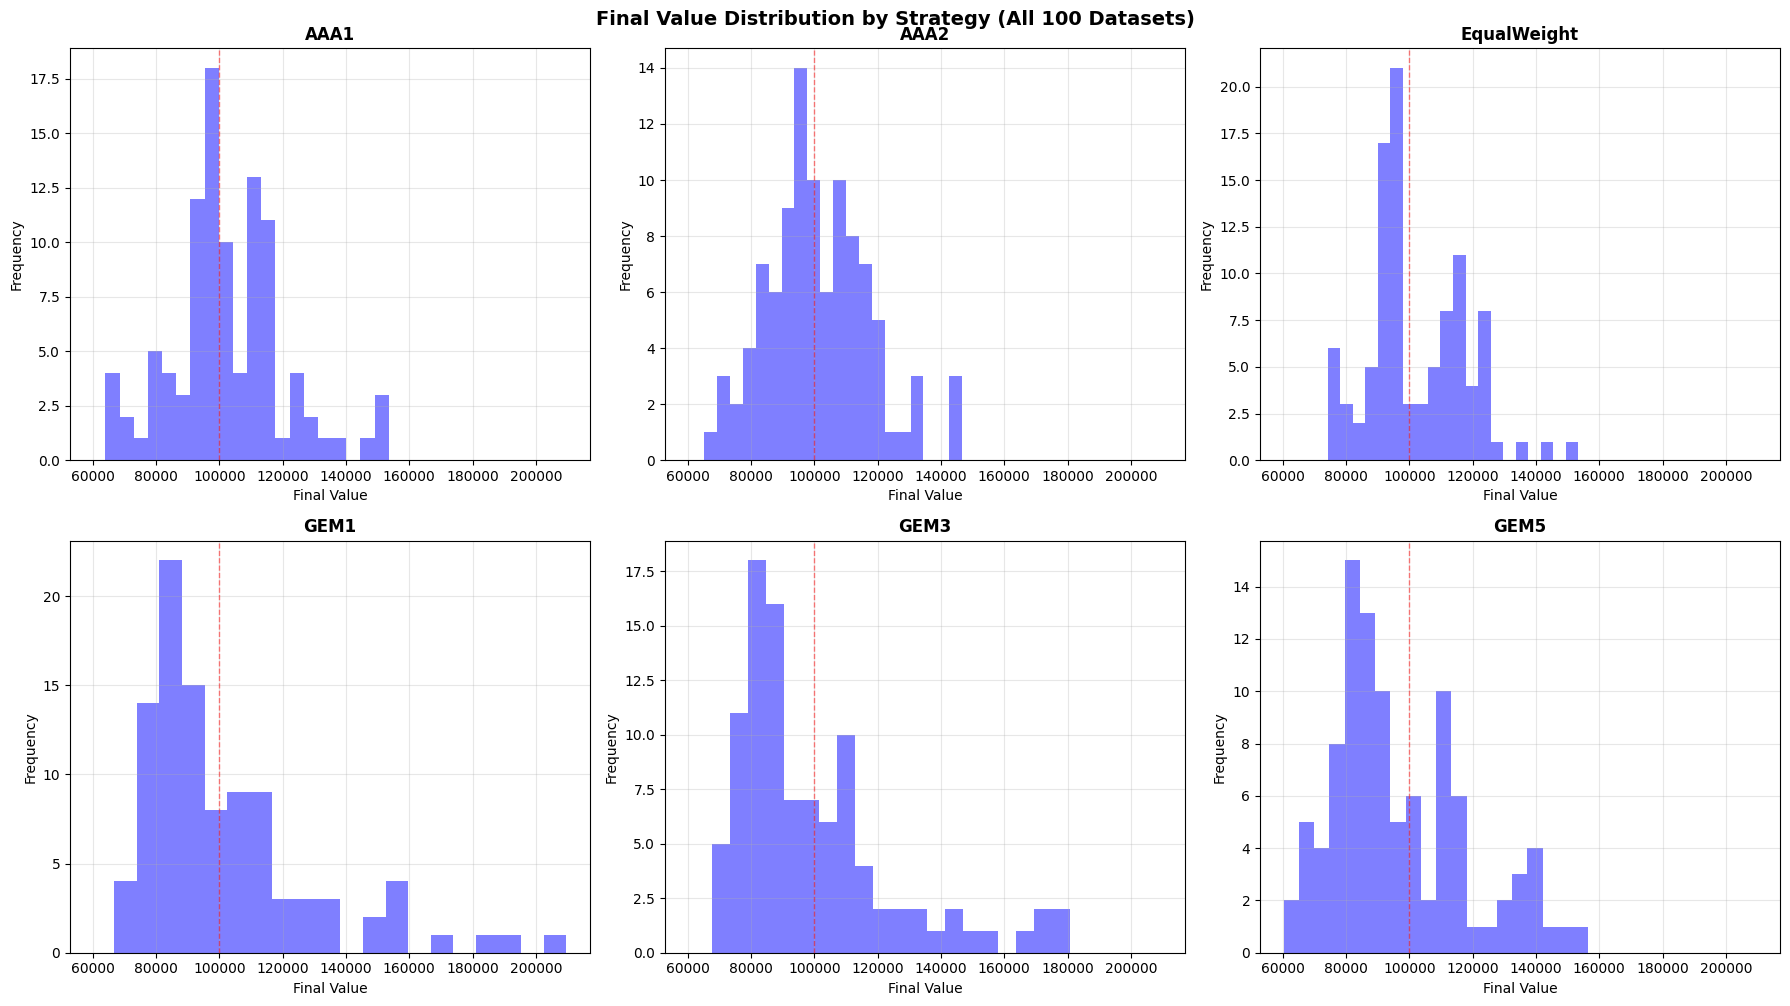

In [45]:
# plot histograms of final values across all datasets and strategies. Make subplots for each strategy
# Calculate global min/max for consistent axes
all_final_values = []
for strategy in filtered_strategies:
    datasets_stats = test_results.strategies[strategy].get_datasets_bt_performance()
    all_final_values.extend(datasets_stats['final_value'].values)

fv_min, fv_max = min(all_final_values), max(all_final_values)
# Add padding
fv_padding = (fv_max - fv_min) * 0.05

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten() if n_strategies > 1 else [axes]
for i, strategy in enumerate(filtered_strategies):
    ax = axes[i]
    datasets_stats = test_results.strategies[strategy].get_datasets_bt_performance()
    final_values = datasets_stats['final_value'].values
    
    ax.hist(final_values, bins=20, color='blue', alpha=0.5)
    ax.set_title(f'{strategy}', fontweight='bold')
    ax.set_xlabel('Final Value')
    ax.set_ylabel('Frequency')
    ax.set_xlim(fv_min - fv_padding, fv_max + fv_padding)
    ax.grid(True, alpha=0.3)
    ax.axvline(100000, color='red', linestyle='--', linewidth=1, alpha=0.5)
# Hide unused subplots
for idx in range(n_strategies, len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.suptitle('Final Value Distribution by Strategy (All 100 Datasets)',
                fontsize=14, fontweight='bold', y=1.001)
plt.show()
